In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Signal parameters

amp = 0.1 # V

freq = 8 # Hz  


In [3]:
# Sampling parameters

srate = 1000 # Hz

time  = np.arange(0, 1, 1/srate)

In [4]:
# Create the signal

signal = amp * np.sin( 2 * np.pi * freq * time)

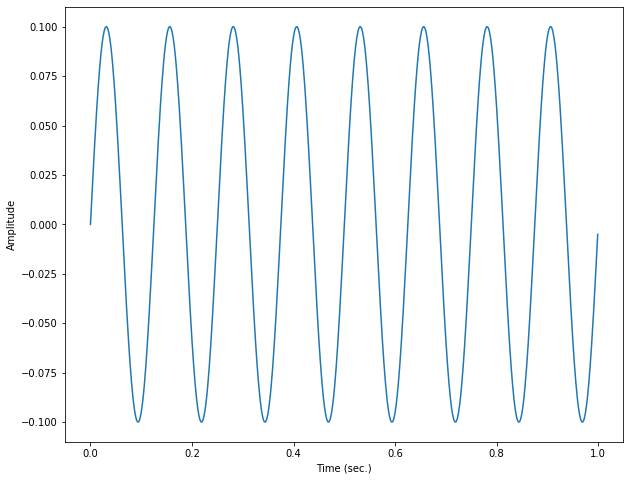

In [6]:
plt.figure(figsize=(10,8))
plt.plot(time,signal)

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
# Add noise

noise_amp = 0.1

noise  = noise_amp * np.random.randn(len(time))

dirty = signal + noise

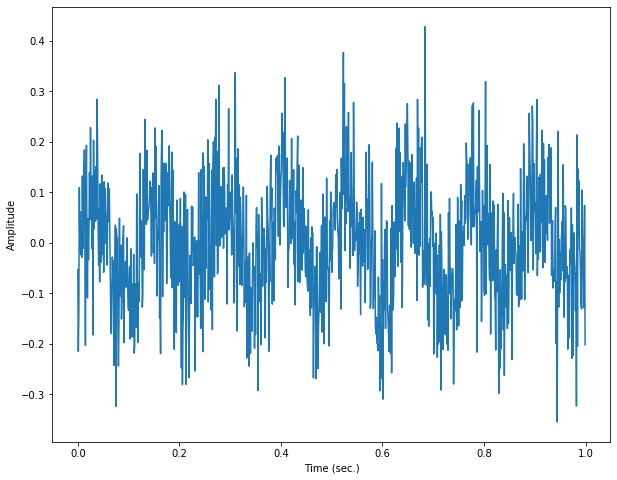

In [8]:
plt.figure(figsize=(10,8))
plt.plot(time,dirty)

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

In [9]:
## Create Gaussian kernel
# full-width half-maximum: the key Gaussian parameter

fwhm = 25 # in ms

# Normalized time vector in ms

k = 40
gtime = 1000*np.arange(-k,k)/srate

In [10]:
# Create Gaussian window

gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

In [11]:
# Compute empirical FWHM

pstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauswin-.5)**2 )

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

empFWHM

26.0

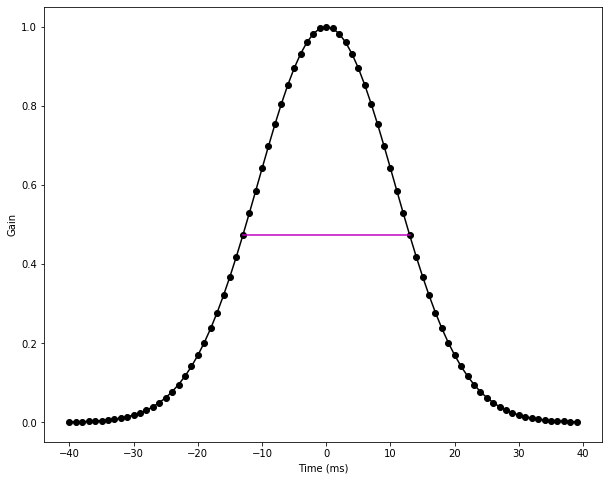

In [12]:
# Show the Gaussian

plt.figure(figsize=(10,8))
plt.plot(gtime,gauswin,'ko-')
plt.plot([gtime[prePeakHalf],gtime[pstPeakHalf]],[gauswin[prePeakHalf],gauswin[pstPeakHalf]],'m')

plt.xlabel('Time (ms)')
plt.ylabel('Gain')

plt.show()

In [13]:
# Normalize Gaussian to unit energy

gauswin = gauswin / np.sum(gauswin)

In [14]:
# Initialize filtered signal vector

filtered = np.zeros(len(time))

In [15]:
# Implement the running mean filter

for i in range(k,len(time)-k-1):
    # each point is the average of k surrounding points
    filtered[i] = np.sum( dirty[i-k:i+k]*gauswin )

Text(0.5, 1.0, 'Gaussian smoothing filter')

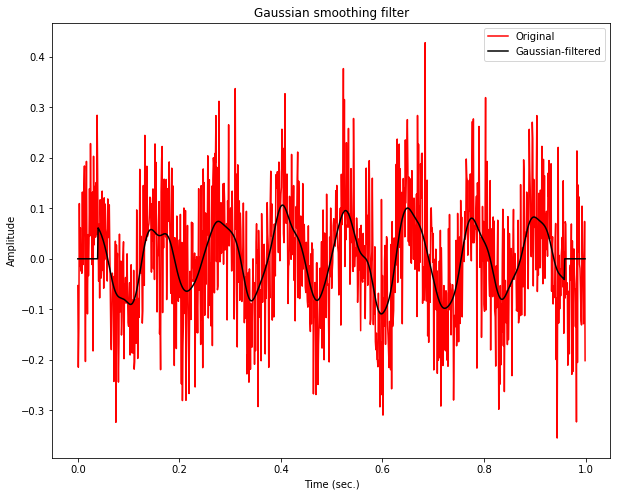

In [16]:
# Plot the noisy and filtered signals

plt.figure(figsize=(10,8))
plt.plot(time,dirty,'r',label='Original')
plt.plot(time,filtered,'k',label='Gaussian-filtered')

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Gaussian smoothing filter')


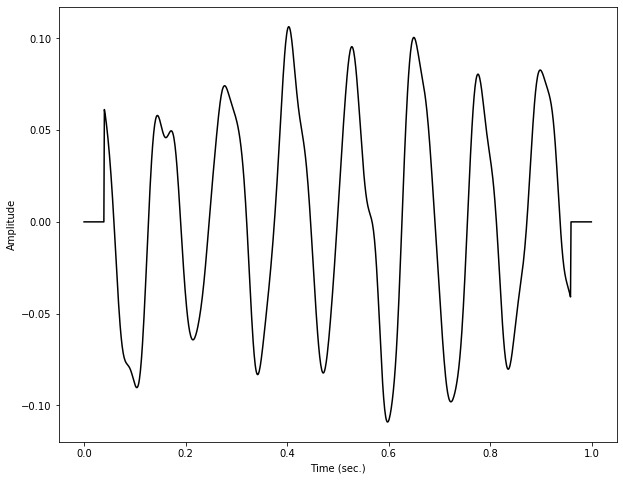

In [17]:
plt.figure(figsize=(10,8))
plt.plot(time,filtered, 'k')

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()